<a href="https://colab.research.google.com/github/hosseinrezaie0/Heart-Failure-Prediction/blob/main/main(feature_selection_filter_methods).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, log_loss

import warnings as wr
wr.filterwarnings('ignore')

## Preprocessing

In [2]:
df = pd.read_csv('/content/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [16]:
# Drop data with cholesterol = 0
df = df[df['Cholesterol'] != 0]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             746 non-null    float64
 1   Sex             746 non-null    float64
 2   ChestPainType   746 non-null    float64
 3   RestingBP       746 non-null    float64
 4   Cholesterol     746 non-null    float64
 5   FastingBS       746 non-null    float64
 6   RestingECG      746 non-null    float64
 7   MaxHR           746 non-null    float64
 8   ExerciseAngina  746 non-null    float64
 9   Oldpeak         746 non-null    float64
 10  ST_Slope        746 non-null    float64
 11  HeartDisease    746 non-null    float64
dtypes: float64(12)
memory usage: 70.1 KB


In [17]:
# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.755102,1,0,0.68,0.411277,0.0,1,0.563380,1,0.750000,0,1.0
1,0.265306,1,0,0.55,0.285240,0.0,0,0.690141,0,0.295455,2,1.0
2,0.489796,1,3,0.59,0.308458,0.0,0,0.915493,0,0.295455,1,0.0
3,0.428571,1,1,0.65,0.441128,0.0,1,0.781690,0,0.363636,2,0.0
4,0.265306,1,1,0.60,0.489221,0.0,1,0.774648,0,0.295455,2,0.0


In [18]:
# Convert Categorical columns into numerical columns
encoder = LabelEncoder()

categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
  df[col] = encoder.fit_transform(df[col])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.755102,1,0,0.68,0.411277,0.0,1,0.563380,1,0.750000,0,1.0
1,0.265306,1,0,0.55,0.285240,0.0,0,0.690141,0,0.295455,2,1.0
2,0.489796,1,3,0.59,0.308458,0.0,0,0.915493,0,0.295455,1,0.0
3,0.428571,1,1,0.65,0.441128,0.0,1,0.781690,0,0.363636,2,0.0
4,0.265306,1,1,0.60,0.489221,0.0,1,0.774648,0,0.295455,2,0.0


In [19]:
# Normalize non_categorical columns
scaler = MinMaxScaler()
non_categorical_columns = df.columns.difference(categorical_columns)
df[non_categorical_columns] = scaler.fit_transform(df[non_categorical_columns])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.755102,1.0,0.000000,0.407407,0.314672,0.0,0.5,0.533835,1.0,0.650794,0.0,1.0
1,0.265306,1.0,0.000000,0.166667,0.167954,0.0,0.0,0.669173,0.0,0.015873,1.0,1.0
2,0.489796,1.0,1.000000,0.240741,0.194981,0.0,0.0,0.909774,0.0,0.015873,0.5,0.0
3,0.428571,1.0,0.333333,0.351852,0.349421,0.0,0.5,0.766917,0.0,0.111111,1.0,0.0
4,0.265306,1.0,0.333333,0.259259,0.405405,0.0,0.5,0.759398,0.0,0.015873,1.0,0.0


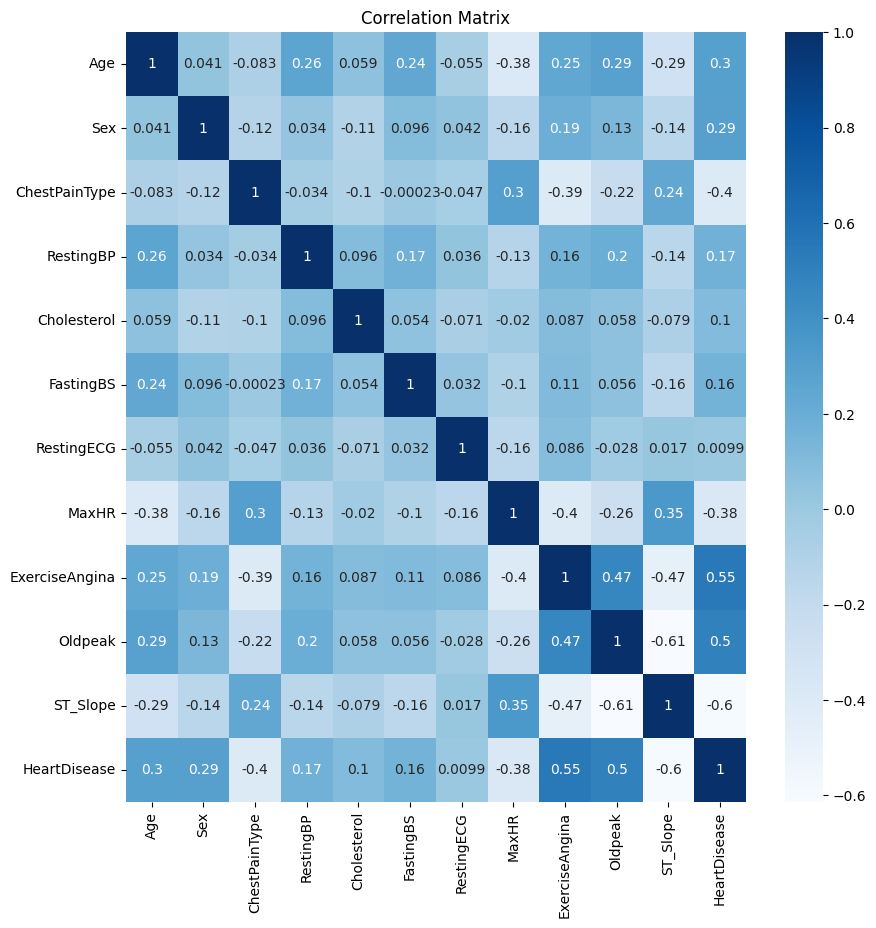

In [20]:
# Plot Correlation Matrix

fig, axes = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues', ax=axes)
axes.set_title('Correlation Matrix')
plt.show()

In [22]:
# Drop RestECG column - based on correlation
df = df.drop('RestingECG', axis=1)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.755102,1.0,0.000000,0.407407,0.314672,0.0,0.533835,1.0,0.650794,0.0,1.0
1,0.265306,1.0,0.000000,0.166667,0.167954,0.0,0.669173,0.0,0.015873,1.0,1.0
2,0.489796,1.0,1.000000,0.240741,0.194981,0.0,0.909774,0.0,0.015873,0.5,0.0
3,0.428571,1.0,0.333333,0.351852,0.349421,0.0,0.766917,0.0,0.111111,1.0,0.0
4,0.265306,1.0,0.333333,0.259259,0.405405,0.0,0.759398,0.0,0.015873,1.0,0.0


In [35]:
df.columns.size

11

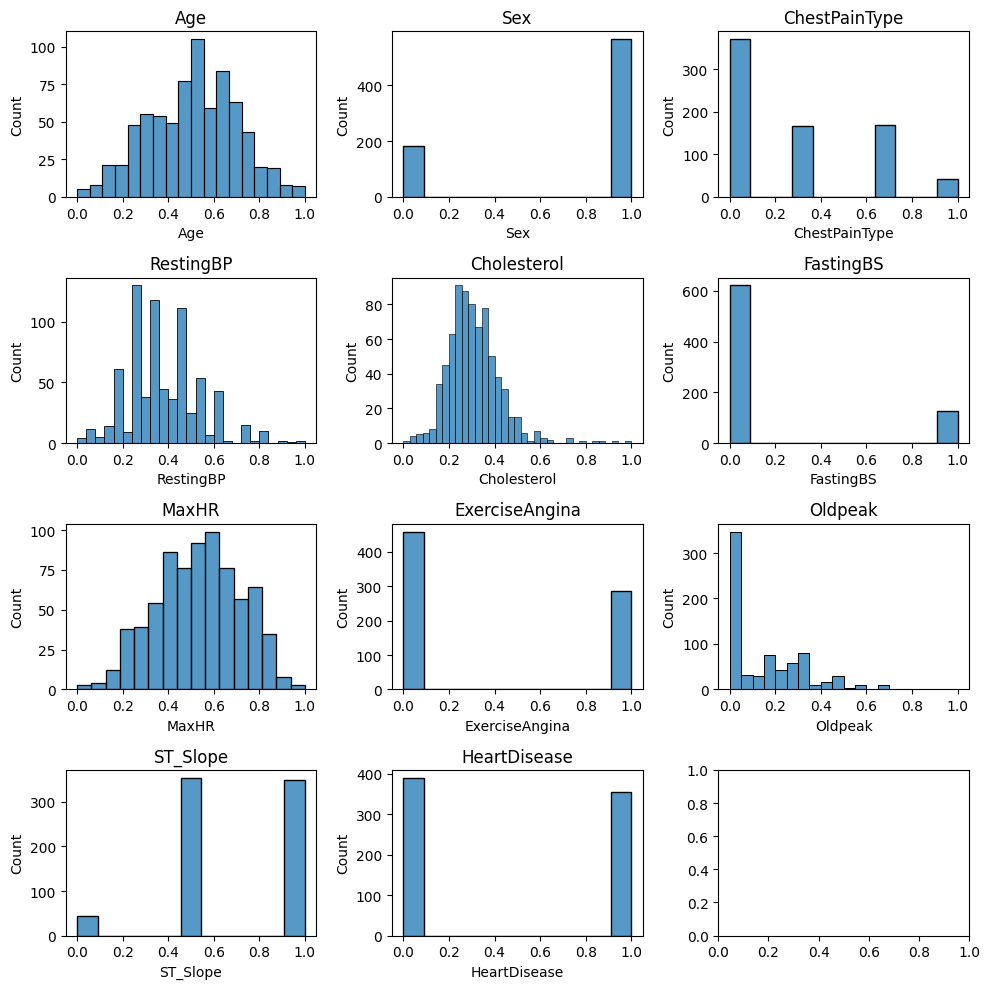

In [37]:
# Plot the distribution of columns
fig, axes = plt.subplots(4, 3, figsize=(10,10))
axes = axes.flatten()
for i, col in enumerate(df.columns):
  if i != 12:
    sns.histplot(df[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()